In [13]:
import pandas as pd
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt


In [2]:
temps_df = pd.read_csv("Houston_Temps.csv")
temps_df.head(5)


,Date,High,Low,Average,Precip
0,1/1/2005,75,62,68.5,T
1,1/2/2005,73,66,69.5,0
2,1/3/2005,79,66,72.5,0
3,1/4/2005,73,66,69.5,0.04
4,1/5/2005,77,46,61.5,0.01


In [3]:
norms_df = pd.read_csv("Houston_Norms.csv")
norms_df.head(5)

,Month,Day,Normal Max,Normal Min,Record Max,Record Max Year,Low Max,Low Max Year,Record Min,Record Min Year,High Min,High Min Year,Normal Average
0,1,1,62,41,80,1934,36,2001,25,1979,69,1956,51.5
1,1,2,62,41,82,1965,35,1979,17,1979,69,2000,51.5
2,1,3,62,41,83,1989,37,1974,18,1979,68,2004,51.5
3,1,4,62,41,78,1957,36,1959,22,1959,66,2005,51.5
4,1,5,62,41,80,1989,40,1972,22,1972,64,1997,51.5


In [4]:
temps_df[["Month","Day","Year"]]  = temps_df.Date.str.split("/",expand=True)
temps_df.head(5)

,Date,High,Low,Average,Precip,Month,Day,Year
0,1/1/2005,75,62,68.5,T,1,1,2005
1,1/2/2005,73,66,69.5,0,1,2,2005
2,1/3/2005,79,66,72.5,0,1,3,2005
3,1/4/2005,73,66,69.5,0.04,1,4,2005
4,1/5/2005,77,46,61.5,0.01,1,5,2005


In [5]:
xyz=['Year',"Month","Day","High", "Low", "Average"]
temps_df = temps_df[xyz]

temps_df.head(5)


,Year,Month,Day,High,Low,Average
0,2005,1,1,75,62,68.5
1,2005,1,2,73,66,69.5
2,2005,1,3,79,66,72.5
3,2005,1,4,73,66,69.5
4,2005,1,5,77,46,61.5


In [6]:
temps_df["Month"] = temps_df["Month"].astype(int)
temps_df["Day"]   = temps_df["Day"].astype(int)
temps_df["Year"]  = temps_df["Year"].astype(int)
temps_df.dtypes

Year         int32
Month        int32
Day          int32
High         int64
Low          int64
Average    float64
dtype: object

In [7]:
focus_year = 2005

temps_year_df = temps_df.loc[temps_df["Year"] == focus_year, : ]
temps_year_df.head()

,Year,Month,Day,High,Low,Average
0,2005,1,1,75,62,68.5
1,2005,1,2,73,66,69.5
2,2005,1,3,79,66,72.5
3,2005,1,4,73,66,69.5
4,2005,1,5,77,46,61.5


In [8]:
temps_year_df = pd.merge(temps_year_df, norms_df, on=("Month", "Day"), how="right")
temps_year_df

,Year,Month,Day,High,Low,Average,Normal Max,Normal Min,Record Max,Record Max Year,Low Max,Low Max Year,Record Min,Record Min Year,High Min,High Min Year,Normal Average
0,2005.0,1,1,75.0,62.0,68.5,62,41,80,1934,36,2001,25,1979,69,1956,51.5
1,2005.0,1,2,73.0,66.0,69.5,62,41,82,1965,35,1979,17,1979,69,2000,51.5
2,2005.0,1,3,79.0,66.0,72.5,62,41,83,1989,37,1974,18,1979,68,2004,51.5
3,2005.0,1,4,73.0,66.0,69.5,62,41,78,1957,36,1959,22,1959,66,2005,51.5
4,2005.0,1,5,77.0,46.0,61.5,62,41,80,1989,40,1972,22,1972,64,1997,51.5
5,2005.0,1,6,47.0,39.0,43.0,62,41,80,1989,38,1971,22,1972,64,1965,51.5
6,2005.0,1,7,52.0,42.0,47.0,62,41,79,1989,36,1971,19,1970,62,1965,51.5
7,2005.0,1,8,66.0,43.0,54.5,62,41,80,1957,36,1968,19,1996,64,1965,51.5
8,2005.0,1,9,76.0,45.0,60.5,62,41,82,1957,34,1973,19,1976,66,1965,51.5
9,2005.0,1,10,76.0,65.0,70.5,62,41,82,1957,34,1973,19,1976,66,1965,51.5


## Identify and Note any new records:

In [9]:
for x in range(len(temps_year_df.index)):  # don't hardcode number of records - we may want to use a different scope later
    if temps_year_df.iloc[x,0] == focus_year:  # 2/29 will be missing in non-leapyears
        x_high    = temps_year_df.iloc[x,3]
        x_low     = temps_year_df.iloc[x,4]
        x_year    = temps_year_df.iloc[x,0]  
        x_day     = temps_year_df.iloc[x,2]
        x_month   = temps_year_df.iloc[x,1]
        x_record_max = temps_year_df.iloc[x,8]
        x_record_min = temps_year_df.iloc[x,12]
        x_low_max    = temps_year_df.iloc[x,10]
        x_high_min   = temps_year_df.iloc[x,14]

        if x_high > x_record_max:
            print(f'New Record High of {x_high} on {x_month}/{x_day} replaces old record of {x_record_max} from {temps_year_df.iloc[x,9]}')
            temps_year_df.iloc[x,8]   = x_high
            temps_year_df.iloc[x,9]   = x_year
        if x_high < x_low_max:
            print(f'New Record Low Max of {x_high} on {x_month}/{x_day} replaces old record of {x_low_max} from {temps_year_df.iloc[x,11]}')
            temps_year_df.iloc[x,10]   = x_high
            temps_year_df.iloc[x,11]  = x_year
        if x_low < x_record_min:
            print(f'New Record Low of {x_low} on {x_month}/{x_day} replaces old record of {x_record_min} from {temps_year_df.iloc[x,13]}')
            temps_year_df.iloc[x,12]  = x_low
            temps_year_df.iloc[x,13]  = x_year
        if x_low > x_high_min:
            print(f'New Record High Min of {x_low} on {x_month}/{x_day} replaces old record of {x_high_min} from {temps_year_df.iloc[x,15]}')
            temps_year_df.iloc[x,14]  = x_low
            temps_year_df.iloc[x,15]  = x_year


        

Save the updated records:

In [10]:
xyz=["Month","Day","Normal Max","Normal Min","Record Max","Record Max Year","Low Max","Low Max Year","Record Min","Record Min Year","High Min","High Min Year","Normal Average"]
norms_new_df = temps_year_df[xyz]

filename = "Houston_Norms_" + str(focus_year) + ".csv"
norms_new_df.to_csv(filename, index=False, header=True)


## Find out how much warmer or cooler than normal each day is, then acccumulate the differences throughout the year

In [11]:
temps_year_df["Average Diff"] = temps_year_df["Average"] - temps_year_df["Normal Average"]
temps_year_df["Accum Diff"] = temps_year_df["Average Diff"]
temps_year_df.head()

,Year,Month,Day,High,Low,Average,Normal Max,Normal Min,Record Max,Record Max Year,Low Max,Low Max Year,Record Min,Record Min Year,High Min,High Min Year,Normal Average,Average Diff,Accum Diff
0,2005.0,1,1,75.0,62.0,68.5,62,41,80,1934,36,2001,25,1979,69,1956,51.5,17.0,17.0
1,2005.0,1,2,73.0,66.0,69.5,62,41,82,1965,35,1979,17,1979,69,2000,51.5,18.0,18.0
2,2005.0,1,3,79.0,66.0,72.5,62,41,83,1989,37,1974,18,1979,68,2004,51.5,21.0,21.0
3,2005.0,1,4,73.0,66.0,69.5,62,41,78,1957,36,1959,22,1959,66,2005,51.5,18.0,18.0
4,2005.0,1,5,77.0,46.0,61.5,62,41,80,1989,40,1972,22,1972,64,1997,51.5,10.0,10.0


In [12]:
for x in range(1,len(temps_year_df.index)):
    y = x-1
    temps_year_df.iloc[x,18]   = temps_year_df.iloc[y,18] + temps_year_df.iloc[x,17]
    
temps_year_df.head()

,Year,Month,Day,High,Low,Average,Normal Max,Normal Min,Record Max,Record Max Year,Low Max,Low Max Year,Record Min,Record Min Year,High Min,High Min Year,Normal Average,Average Diff,Accum Diff
0,2005.0,1,1,75.0,62.0,68.5,62,41,80,1934,36,2001,25,1979,69,1956,51.5,17.0,17.0
1,2005.0,1,2,73.0,66.0,69.5,62,41,82,1965,35,1979,17,1979,69,2000,51.5,18.0,35.0
2,2005.0,1,3,79.0,66.0,72.5,62,41,83,1989,37,1974,18,1979,68,2004,51.5,21.0,56.0
3,2005.0,1,4,73.0,66.0,69.5,62,41,78,1957,36,1959,22,1959,66,2005,51.5,18.0,74.0
4,2005.0,1,5,77.0,46.0,61.5,62,41,80,1989,40,1972,22,1972,64,1997,51.5,10.0,84.0


### Graph out the accumulated difference over the course of the year


<IPython.core.display.Javascript object>


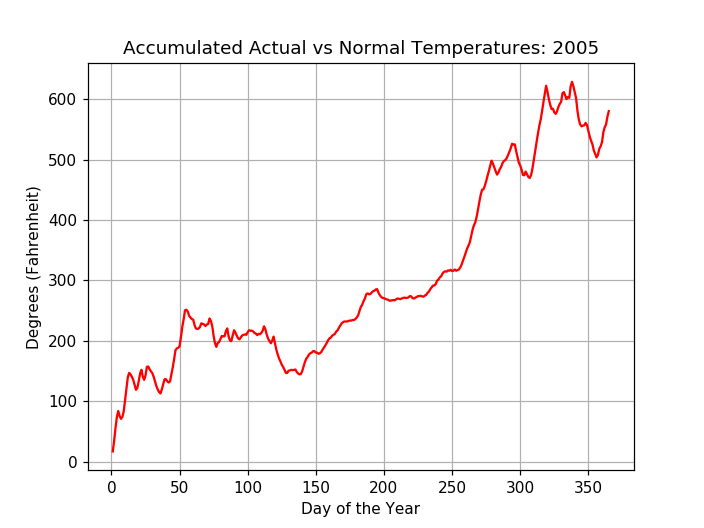

In [20]:
x_axis = np.arange(1, 367, 1)
y_axis = temps_year_df.iloc[:,18]

plt.title("Accumulated Actual vs Normal Temperatures: " + str(focus_year))
plt.xlabel("Day of the Year")
plt.ylabel("Degrees (Fahrenheit)")
plt.grid()


plt.plot(x_axis, y_axis,  color='red', label='Label')

plt.savefig("year_chart_" + str(focus_year) + ".jpg")



